<a href="https://colab.research.google.com/github/sattwiksuman/Digital_Operations_and_Supply_Chain_Management/blob/main/ABC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the excel data as a pandas dataframe

df = pd.read_excel('/content/210224_01_Demand and delivery quantities Q1 2017.xlsx')

In [5]:
#Have a look at the data and see the data columns:
df.head()

,Kunden-Nr.,Artikel-Nr.,Belegdatum,Beleg-Nr.,Menge,Stat.Menge
0,1010020003,10002,2017-02-01,L117006002,48.0,1152.0
1,1010020004,10002,2017-02-02,L117006051,72.0,1728.0
2,1010030001,10002,2017-02-01,L117006054,96.0,2304.0
3,1010030002,10002,2017-01-03,L117000029,1.0,24.0
4,1010030002,10002,2017-01-09,L117000131,1.0,24.0


In [6]:
df.describe

<bound method NDFrame.describe of         Kunden-Nr.  Artikel-Nr. Belegdatum   Beleg-Nr.  Menge  Stat.Menge
0       1010020003        10002 2017-02-01  L117006002   48.0      1152.0
1       1010020004        10002 2017-02-02  L117006051   72.0      1728.0
2       1010030001        10002 2017-02-01  L117006054   96.0      2304.0
3       1010030002        10002 2017-01-03  L117000029    1.0        24.0
4       1010030002        10002 2017-01-09  L117000131    1.0        24.0
...            ...          ...        ...         ...    ...         ...
167020  1200004033        40197 2017-03-16  L117017232    5.0        60.0
167021  1200004048        40197 2017-03-03  L117014159    4.0        48.0
167022  1200004049        40197 2017-03-28  L117020090    4.0        48.0
167023  4040002000        40197 2017-03-22  L117018709    1.0        12.0
167024  4160004000        40197 2017-02-27  L117012670    5.0        60.0

[167025 rows x 6 columns]>

In [7]:
df.columns

Index(['Kunden-Nr.', 'Artikel-Nr.', 'Belegdatum', 'Beleg-Nr.', 'Menge',
       'Stat.Menge'],
      dtype='object')

In [29]:
#Function to carry out ABC analysis on some column 'ABC_on' of the dataframe 'df' as per the data given in another column 'according_to'

def ABC_analysis(df: pd.DataFrame, ABC_on: str, according_to: str):
    df_artikel = df.loc[:, [ABC_on, according_to]]
    df_artikel.groupby([ABC_on])[according_to].sum().reset_index()
    df_artikel_sorted = df_artikel.groupby([ABC_on])[according_to].sum().reset_index()
    df_artikel_sorted.sort_values(by=according_to, ascending=False, ignore_index=True, inplace=True)
    df_artikel_sorted['cum_sum']=df_artikel_sorted[according_to].cumsum()
    df_artikel_sorted['Cum_Sum_percent']=100*df_artikel_sorted['cum_sum']/df_artikel_sorted[according_to].sum()
    df_artikel_sorted['Class']='Class B'
    df_artikel_sorted.loc[df_artikel_sorted['Cum_Sum_percent']<=80, ['Class']]='Class A'
    df_artikel_sorted.loc[df_artikel_sorted['Cum_Sum_percent']>95, ['Class']]='Class C'
    ABC_artikel = df_artikel_sorted['Class'].value_counts(ascending=True)
    plt.bar(ABC_artikel.index, ABC_artikel)
    ABC_artikel_results={'number_in_class': {'Class A': ABC_artikel['Class A'], 'Class B': ABC_artikel['Class A'], 
                                        'Class C': ABC_artikel['Class C']}, 
                    'percentage_in_class': {'Class A': 100*ABC_artikel['Class A']/len(df_artikel_sorted), 'Class B': 100*ABC_artikel['Class B']/len(df_artikel_sorted), 
                                        'Class C': 100*ABC_artikel['Class C']/len(df_artikel_sorted)},
                     'products_in_class': {'Class A': df_artikel_sorted.loc[df_artikel_sorted['Class']=='Class A', [ABC_on]][ABC_on].tolist(), 
                                        'Class B': df_artikel_sorted.loc[df_artikel_sorted['Class']=='Class B', [ABC_on]][ABC_on].tolist(), 
                                        'Class C': df_artikel_sorted.loc[df_artikel_sorted['Class']=='Class C', [ABC_on]][ABC_on].tolist()}}
    print("results are stored in a dictionary of dictionaries with keys: 'number_in_class', 'percentage_in_class', 'products_in_class'\n")
    print(f"80% of revenue is obtained from {round(ABC_artikel_results['percentage_in_class']['Class A'], 2)}% or {round(ABC_artikel_results['number_in_class']['Class A'], 2)} number of items analysed here. \n")
    return ABC_artikel_results

results are stored in a dictionary of dictionaries with keys: 'number_in_class', 'percentage_in_class', 'products_in_class'

80% of revenue is obtained from 24.42% or 158 number of items analysed here. 



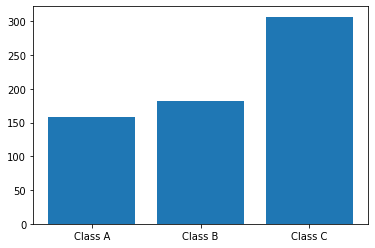

In [30]:
#ABC Analysis on Customers/ Kunden
ABC_kunden_results=ABC_analysis(df = df, ABC_on='Kunden-Nr.', according_to='Stat.Menge')

In [31]:
#Publishing results for ABC analysis on customers/ Kunden:
ABC_kunden_results['percentage_in_class']

{'Class A': 24.420401854714065,
 'Class B': 28.12982998454405,
 'Class C': 47.44976816074188}

results are stored in a dictionary of dictionaries with keys: 'number_in_class', 'percentage_in_class', 'products_in_class'

80% of revenue is obtained from 11.39% or 23 number of items analysed here. 



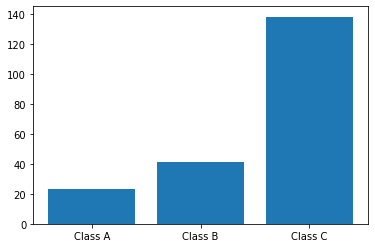

In [32]:
#ABC Analysis on Articles sold
ABC_artikel_results=ABC_analysis(df = df, ABC_on='Artikel-Nr.', according_to='Stat.Menge')

In [33]:
#Publishing results for ABC analysis on articles sold:
ABC_artikel_results['percentage_in_class']

{'Class A': 11.386138613861386,
 'Class B': 20.297029702970296,
 'Class C': 68.31683168316832}